In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('Star39552_balanced.csv')
data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
...,...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,B7Iab,6.982245,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


In [4]:
data.dtypes

Vmag           float64
Plx            float64
e_Plx          float64
B-V            float64
SpType          object
Amag           float64
TargetClass      int64
dtype: object

In [5]:
le = LabelEncoder()
data['SpType'] = le.fit_transform(data['SpType'])
data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,2282,22.502556,1
1,8.26,3.21,1.00,1.130,1928,15.792525,0
2,8.27,12.75,1.06,0.596,1423,18.797552,1
3,6.54,5.23,0.76,1.189,2030,15.132508,0
4,8.52,0.96,0.72,0.173,910,13.431356,1
...,...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,837,6.982245,0
39548,7.05,18.12,0.92,0.424,1264,18.340790,1
39549,9.21,3.89,1.46,0.227,77,17.159748,1
39550,9.01,2.13,1.46,1.467,2478,15.651898,0


In [6]:
y = data['TargetClass']
X = data.drop(['TargetClass'], axis=1)

In [7]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
data.head()
data.describe()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
count,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,7.921309,7.117378,1.109705,0.744336,1462.485386,16.050687,0.500000
std,1.308857,12.446291,0.788133,0.513987,663.321592,2.443937,0.500006
min,-0.620000,-27.840000,0.420000,-0.400000,0.000000,-0.350000,0.000000
25%,7.210000,2.430000,0.800000,0.358000,1039.000000,14.756514,0.000000
50%,8.160000,4.440000,0.990000,0.703000,1601.000000,16.020827,0.500000
75%,8.830000,8.232500,1.230000,1.129000,2030.000000,17.590542,1.000000
max,12.850000,772.330000,40.630000,3.440000,2575.000000,30.449015,1.000000


In [10]:
data['TargetClass'].value_counts()


TargetClass
1    19776
0    19776
Name: count, dtype: int64

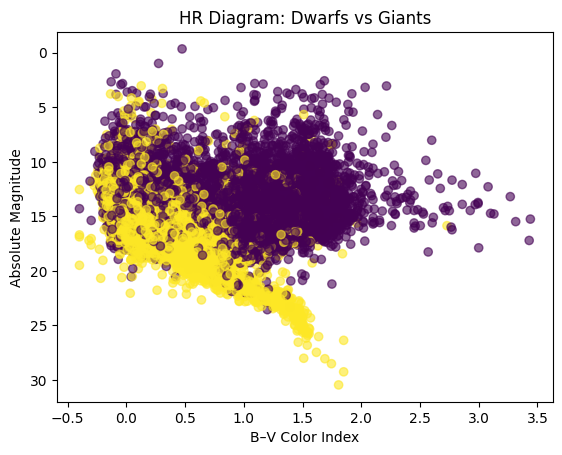

In [11]:
plt.figure()
plt.scatter(
    data['B-V'],
    data['Amag'],
    c=data['TargetClass'],
    alpha=0.6
)
plt.gca().invert_yaxis()   
plt.xlabel('B–V Color Index')
plt.ylabel('Absolute Magnitude')
plt.title('HR Diagram: Dwarfs vs Giants')
plt.show()

In [12]:
data.groupby('TargetClass')[['B-V', 'Amag']].mean()


,B-V,Amag
TargetClass,,
0,1.048567,14.887041
1,0.440105,17.214332


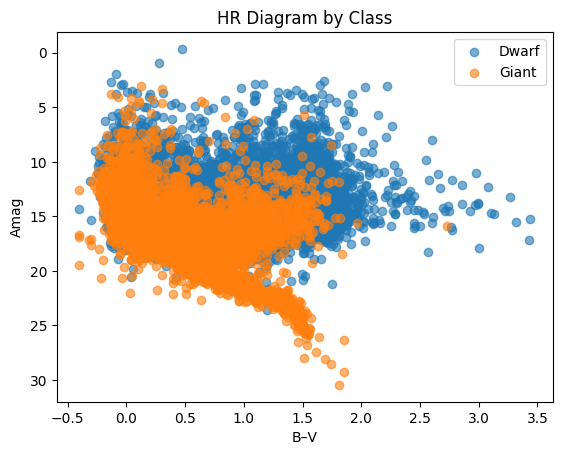

In [13]:
plt.figure()
plt.scatter(
    data[data['TargetClass'] == 0]['B-V'],
    data[data['TargetClass'] == 0]['Amag'],
    label='Dwarf',
    alpha=0.6
)
plt.scatter(
    data[data['TargetClass'] == 1]['B-V'],
    data[data['TargetClass'] == 1]['Amag'],
    label='Giant',
    alpha=0.6
)
plt.gca().invert_yaxis()
plt.xlabel('B–V')
plt.ylabel('Amag')
plt.legend()
plt.title('HR Diagram by Class')
plt.show()


In [14]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [15]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([1, 1, 1, ..., 1, 1, 0], shape=(7911,))

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

[[3305  566]
 [ 385 3655]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      3871
           1       0.87      0.90      0.88      4040

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911



In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8797876374668183


In [18]:
for feature, coef in zip(X.columns, lr.coef_[0]):
    print(f"{feature}: {coef:.3f}")

Vmag: 0.653
Plx: 1.540
e_Plx: 0.077
B-V: -1.669
SpType: -0.360
Amag: 0.940


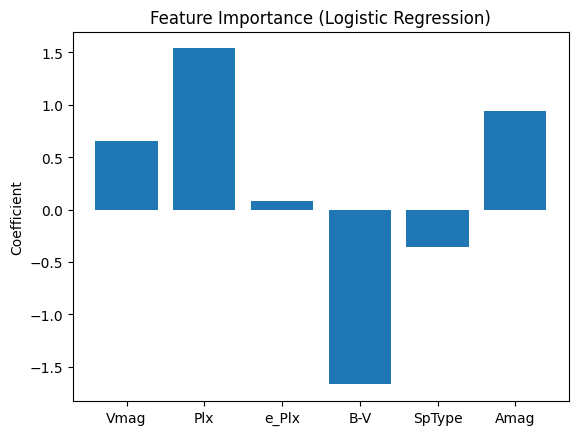

In [19]:
import matplotlib.pyplot as plt

plt.bar(X.columns, lr.coef_[0])
plt.ylabel("Coefficient")
plt.title("Feature Importance (Logistic Regression)")
plt.show()


In [20]:
# Example: [B–V, Amag, e_Plx, SpType, Vmag, Plx]
# Suppose order of features is: ['B-V','Amag','e_Plx','SpType','Vmag','Plx']
new_stars = np.array([
    [7.921309, 1, 1.109705, 1.8, 1462.485386, 1],   # Star 1
    [1.0, 3.5, 0.05, 1.0, 0.0, 30],   # Star 2
    [1.0, 0.2, 0.05, 0.8, 0.0, 15]    # Star 3
])
# Scale using existing scaler (fitted on 6 features)
new_stars_scaled = scaler.transform(new_stars)

# Predict
pred_classes = lr.predict(new_stars_scaled)
pred_probs = lr.predict_proba(new_stars_scaled)

for i, (cls, prob) in enumerate(zip(pred_classes, pred_probs)):
    print(f"Star {i+1} -> Class: {cls} (0=Dwarf, 1=Giant), Probabilities: {prob}")


Star 1 -> Class: 0 (0=Dwarf, 1=Giant), Probabilities: [9.99962271e-01 3.77287159e-05]
Star 2 -> Class: 1 (0=Dwarf, 1=Giant), Probabilities: [0.2477168 0.7522832]
Star 3 -> Class: 0 (0=Dwarf, 1=Giant), Probabilities: [0.9881119 0.0118881]


c:\python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
print(X.min())
print(X.max())


Vmag      -0.62
Plx      -27.84
e_Plx      0.42
B-V       -0.40
SpType     0.00
Amag      -0.35
dtype: float64
Vmag        12.850000
Plx        772.330000
e_Plx       40.630000
B-V          3.440000
SpType    2575.000000
Amag        30.449015
dtype: float64


In [22]:
data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,2282,22.502556,1
1,8.26,3.21,1.00,1.130,1928,15.792525,0
2,8.27,12.75,1.06,0.596,1423,18.797552,1
3,6.54,5.23,0.76,1.189,2030,15.132508,0
4,8.52,0.96,0.72,0.173,910,13.431356,1
...,...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,837,6.982245,0
39548,7.05,18.12,0.92,0.424,1264,18.340790,1
39549,9.21,3.89,1.46,0.227,77,17.159748,1
39550,9.01,2.13,1.46,1.467,2478,15.651898,0


In [23]:
import joblib

joblib.dump(lr, "stellar_model.pkl")
joblib.dump(scaler, "stellar_scaler.pkl")


['stellar_scaler.pkl']

In [24]:
features = ['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag'] 
feature_ranges = {}
stats = data[features].agg(['min', 'max', 'mean', 'median'])
modes = data[features].mode().iloc[0]  # take the first mode if multiple
stats.loc['mode'] = modes
print(stats)


             Vmag         Plx      e_Plx       B-V       SpType       Amag
min     -0.620000  -27.840000   0.420000 -0.400000     0.000000  -0.350000
max     12.850000  772.330000  40.630000  3.440000  2575.000000  30.449015
mean     7.921309    7.117378   1.109705  0.744336  1462.485386  16.050687
median   8.160000    4.440000   0.990000  0.703000  1601.000000  16.020827
mode     8.400000    2.710000   0.870000  1.000000  1928.000000  14.526547


In [25]:
lr.coef_

array([[ 0.65299223,  1.53972828,  0.07730483, -1.66874502, -0.36005915,
         0.94010532]])